## Asset path visualisation

We can use the `matplotlib` library in Python to visualise what the binomial tree looks like.<br><br>
Notice that we get a distribution skewed toward higher values. This will be a familiar outcome if you have studied dertivatives.<br><br>
Notice that thicker lines are denoting the paths "more travelled".

In [1]:
# First import the required libraries

import numpy as np
import matplotlib.pyplot as plt

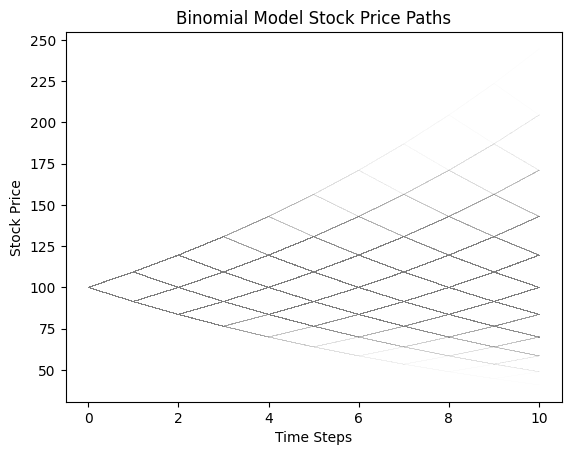

In [2]:
# Create paths for the binomial model and show them on a chart

# Constants
YEARS = 2
TIME_STEP_FRACTION = 1 / 5  # number of time steps per year
SIGMA = 0.2  # volatility of the asset
STARTING_PRICE = 100
RISK_FREE_RATE = 0.025

time_steps = int(YEARS / TIME_STEP_FRACTION)
up_move = np.exp(SIGMA*np.sqrt(TIME_STEP_FRACTION))
down_move = 1/up_move
probability_up = (np.exp(RISK_FREE_RATE*TIME_STEP_FRACTION)-down_move)/(up_move-down_move)
disc = np.exp(RISK_FREE_RATE*YEARS)

paths_so_far = np.array([[STARTING_PRICE]])

def add_timestep(paths_so_far):
    new_paths = []
    for path in paths_so_far:
        new_paths.append(np.append(path, path[-1] * up_move))
        new_paths.append(np.append(path, path[-1] * down_move))
    return np.array(new_paths)

new_paths = add_timestep(paths_so_far)

for i in range(time_steps - 1):
    new_paths = add_timestep(new_paths)

# create a line chart of the new_paths
for path in new_paths:
    plt.plot(path, color='grey', linewidth=0.01)

plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Binomial Model Stock Price Paths')
plt.show()